In [5]:
# Simple CNN model for CIFAR-10
# Importing required packages/libraries 
import numpy as np

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_data_format('channels_first')
from keras.layers import Activation, Dense
from keras.utils import to_categorical

In [6]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
num_classes=10
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# one hot encode ouputs
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


170500096/170498071 [==============================] - 2s 0us/step


In [7]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
# creating model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [10]:
# compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 80)                655440    
_________________________________________________________________
activation (Activation)      (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8

In [12]:
# Fitting the model
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=0.2, shuffle=True)
scores = model.evaluate(X_test, y_test, verbose=1)
model.save('./model'+'.h5')
print("Test loss: ", scores[0])
print("Test accuracy: ", scores[1])

Epoch 1/25
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8462 - accuracy: 0.3254 - val_loss: 1.4087 - val_accuracy: 0.5028
Epoch 2/25
1250/1250 [==============================] - 39s 31ms/step - loss: 1.3217 - accuracy: 0.5235 - val_loss: 1.2437 - val_accuracy: 0.5640
Epoch 3/25
1250/1250 [==============================] - 39s 31ms/step - loss: 1.1899 - accuracy: 0.5782 - val_loss: 1.1770 - val_accuracy: 0.5865
Epoch 4/25
1250/1250 [==============================] - 39s 31ms/step - loss: 1.0866 - accuracy: 0.6089 - val_loss: 1.1730 - val_accuracy: 0.5855
Epoch 5/25
1250/1250 [==============================] - 39s 31ms/step - loss: 1.0319 - accuracy: 0.6337 - val_loss: 1.1020 - val_accuracy: 0.6116
Epoch 6/25
1250/1250 [==============================] - 39s 31ms/step - loss: 0.9651 - accuracy: 0.6563 - val_loss: 1.0866 - val_accuracy: 0.6217
Epoch 7/25
1250/1250 [==============================] - 39s 32ms/step - loss: 0.9178 - accuracy: 0.6774 - val_loss: 1.0745 -

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import*



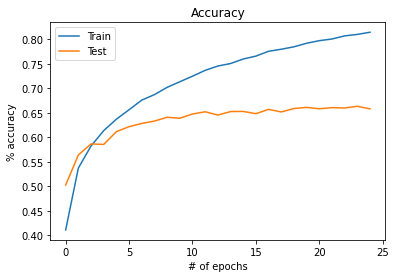

In [18]:
plt.figure()
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.title('Accuracy')
plt.ylabel("% accuracy")
plt.xlabel('# of epochs')
plt.legend()
plt.show()

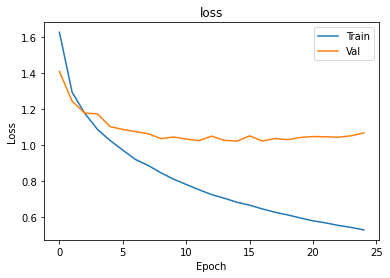

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [20]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                  'dog', 'frog', 'horse', 'ship', 'truck']
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

data = dict (zip(classes, classification))

In [21]:
image_test = []
for i in range(5):
  image_test = X_test[i]
  test = image_test.reshape(1,32,32,3)
  predict_img = np.argmax(model.predict(test), axis=-1)[0]
  print("Image Class: ", data[y_test[i][0]], '\n', "Predicted: ", data[predict_img])

Image Class:  airplane 
 Predicted:  cat
Image Class:  airplane 
 Predicted:  ship
Image Class:  airplane 
 Predicted:  airplane
Image Class:  automobile 
 Predicted:  airplane
Image Class:  airplane 
 Predicted:  deer
